# Data Preprocessing

In [1]:
# Loaded the dataset using pandas

import pandas as pd
df = pd.read_csv('/home/sabik/Desktop/week_ful/week_nineth/week one/preprocessing/dataSets/titanic/Titanic Dataset.csv')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### - Cleaned column names using .str.strip() and .str.title()
#### - Dropped irrelevant features like 'Ticket', 'Cabin', 'Boat', 'Body', 'Home.Dest'

In [2]:
df.columns = df.columns.str.strip().str.title()
df.drop(columns=['Ticket','Cabin','Boat','Body','Home.Dest'],axis=1,inplace=True)


## Filled missing values:

In [3]:
# 'Embarked': Mode (most frequent value).
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

# 'Fare':Median
df.Fare = df.Fare.fillna(df.Fare.median())

# 'Age': Grouped by 'Pclass' and 'Sex', filled with median of each grou
df.Age = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [4]:
# Converted data types appropriately (int for age)
df.Age = df.Age.astype(int)

In [5]:
# Checked and confirmed no duplicate rows
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

### Visual Analysis

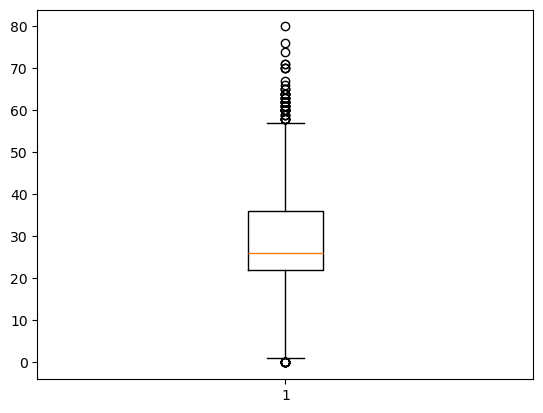

In [6]:
# Boxplot on 'Age' to inspect outliers.
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.show()

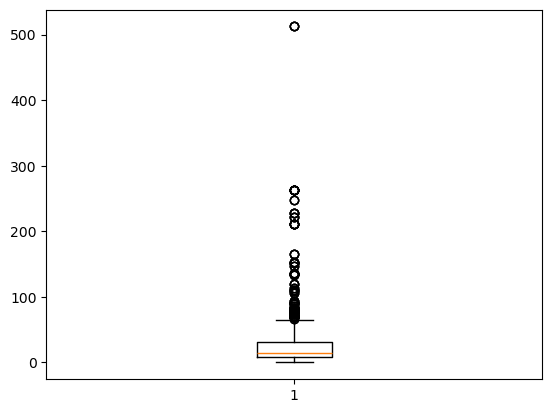

In [7]:
# Boxplot on 'Fare' to inspect outliers.
plt.boxplot(df.Fare)
plt.show()

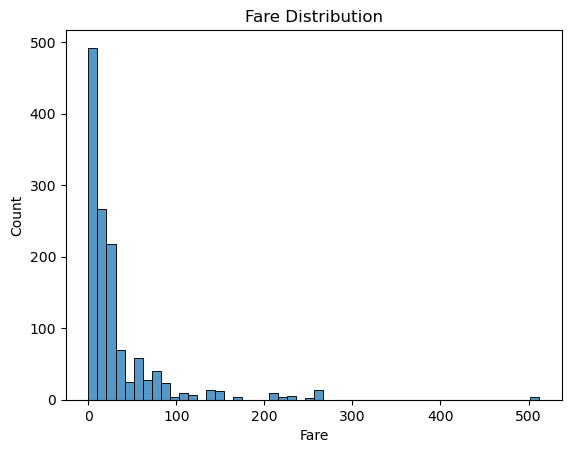

In [8]:
import seaborn as sns 


sns.histplot(df.Fare,bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

### OUTERLIERS

In [9]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)


IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# After outerliers ditect
df1 = df[df.Fare < upper_limit].copy()


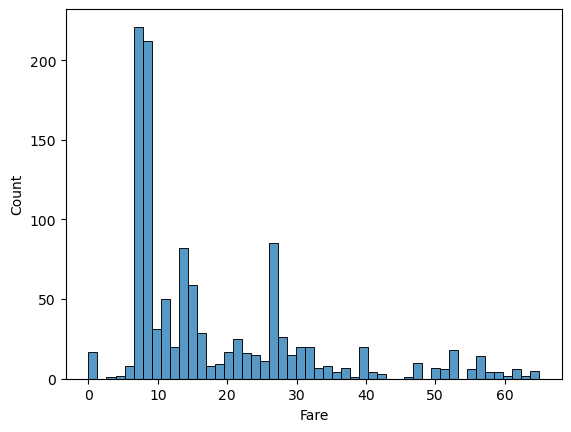

In [10]:
sns.histplot(df1.Fare,bins=50)
plt.show()

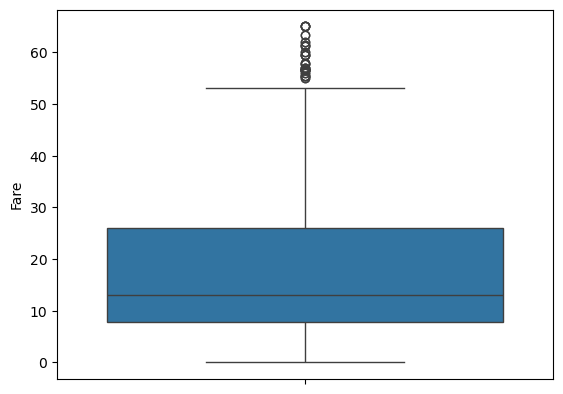

In [11]:
sns.boxplot(df1.Fare)
plt.show()

In [12]:
# Summaries DATASET

df1.describe(include='all')

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked
count,1138.000000,1138.000000,1138,1138,1138.000000,1138.000000,1138.000000,1138.000000,1138
unique,NaN,NaN,1136,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,2,771,NaN,NaN,NaN,NaN,831
mean,2.463972,0.342707,NaN,NaN,28.249561,0.418278,0.328647,17.958992,NaN
std,0.740239,0.474823,NaN,NaN,12.662701,0.851766,0.770547,13.824233,NaN
min,1.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.879200,NaN
50%,3.000000,0.000000,NaN,NaN,25.000000,0.000000,0.000000,13.000000,NaN
75%,3.000000,1.000000,NaN,NaN,35.000000,1.000000,0.000000,26.000000,NaN


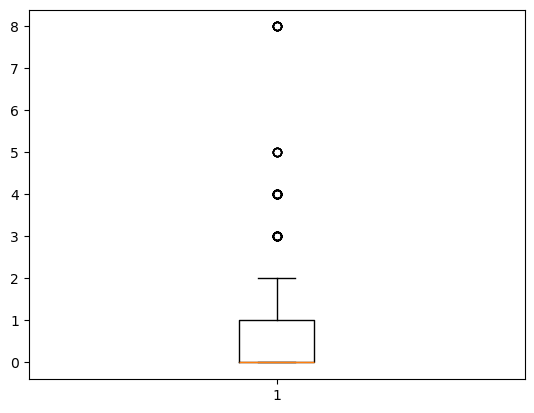

In [13]:
plt.boxplot(df.Sibsp)
plt.show()

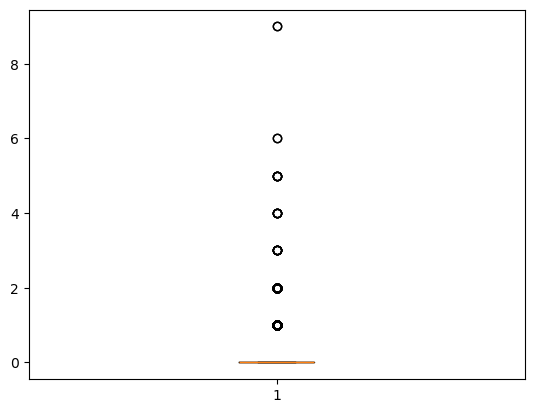

In [14]:
plt.boxplot(df.Parch)
plt.show()

In [15]:
# information about dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 5 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1138 non-null   int64  
 1   Survived  1138 non-null   int64  
 2   Name      1138 non-null   object 
 3   Sex       1138 non-null   object 
 4   Age       1138 non-null   int64  
 5   Sibsp     1138 non-null   int64  
 6   Parch     1138 non-null   int64  
 7   Fare      1138 non-null   float64
 8   Embarked  1138 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 88.9+ KB


## Pivot Tables to understand survival based on:

In [16]:
# Age & Pcalss
pd.pivot_table(df1,values=['Age','Pclass'],index='Survived',aggfunc=['mean'])

mean          
                Age    Pclass
Survived                     
0         29.106952  2.584225
1         26.605128  2.233333

In [17]:
# count survival Pclass bases
df1.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1            90
        0            80
2       0           151
        1           119
3       0           517
        1           181
Name: count, dtype: int64

In [18]:
# Gender (Sex) – survival rate higher in females
Survived_based_on_Sex = pd.pivot_table(df1,index='Sex',values='Survived',aggfunc='mean')
Survived_based_on_Sex

,Survived
Sex,
female,0.675749
male,0.184176


In [19]:

Survived_based_on_Sex1 = pd.crosstab(df1['Sex'],df1['Survived'])
Survived_based_on_Sex1

Survived,0,1
Sex,,
female,119,248
male,629,142


## Feature Engineering

#### Created new features:

In [20]:
# 'Family_size': Total family members aboard
df1['Family_size'] = (df1.Sibsp + df1.Parch)+1

# 'Title': Extracted from names using regex (e.g., Mr, Mrs, Miss).
df1['Title'] = df1['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)

# Dropped original 'Name' column after extraction
df1.drop('Name',axis=1,inplace=True)

# 'Is_Alone': Binary feature identifying passengers traveling alone
df1['Is_Alone'] = (df1['Family_size']==1).astype(int)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 5 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1138 non-null   int64  
 1   Survived     1138 non-null   int64  
 2   Sex          1138 non-null   object 
 3   Age          1138 non-null   int64  
 4   Sibsp        1138 non-null   int64  
 5   Parch        1138 non-null   int64  
 6   Fare         1138 non-null   float64
 7   Embarked     1138 non-null   object 
 8   Family_size  1138 non-null   int64  
 9   Title        1138 non-null   object 
 10  Is_Alone     1138 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 106.7+ KB


# Survival by Sex (Bar Plot)

### Countplot of survival rate by 'Pclass' and 'Sex' using Seaborn.



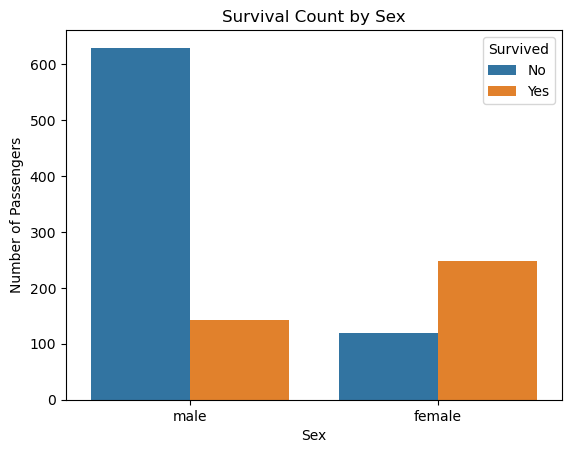

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.countplot(data=df1,x='Sex',hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title="Survived",labels=['No','Yes'])
plt.show()

# Survival by Pclass (Passenger Class)

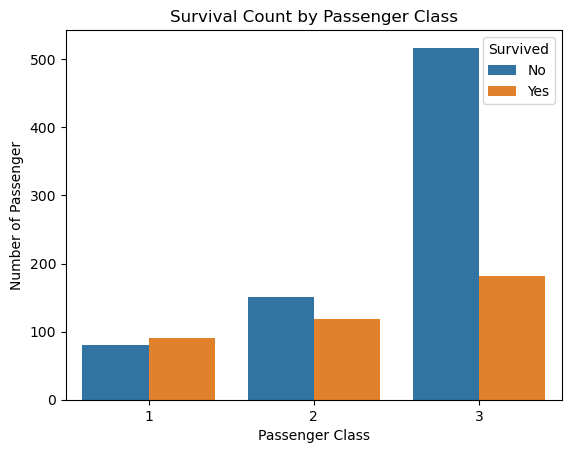

In [23]:
sns.countplot(data=df1,x='Pclass',hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passenger')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

#  Survival by Age (KDE)

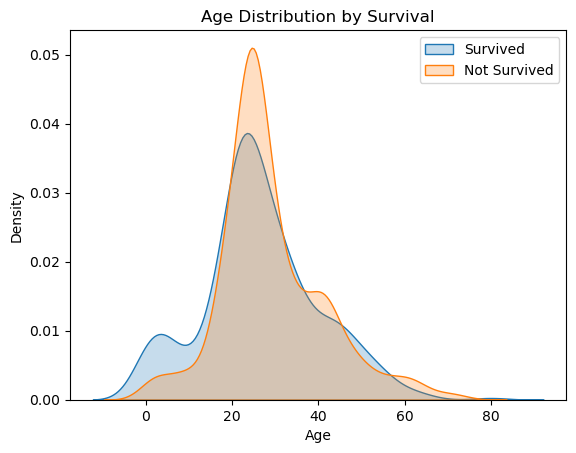

In [24]:
sns.kdeplot(data=df1[df1['Survived'] == 1]['Age'], label='Survived',fill=True)
sns.kdeplot(data=df1[df1['Survived'] == 0]['Age'], label='Not Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()


#### Encoding Categorical Variables



In [25]:
df2 = pd.get_dummies(df1, columns=['Sex', 'Embarked', 'Title'], drop_first=False)

### Import Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns 
import matplotlib.pyplot as plt

### Train-Test Split

In [27]:
# X = all columns except 'Survived'
X = df2.drop('Survived',axis=1)
y = df2['Survived']

# Split into train and test sets (80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

####  Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Evaluation

#### Logistic Regression

In [29]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### Random Forest  Classifier




In [30]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Predict and Evaluate 

#### Logistic Regression

In [31]:
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression Results')
print('Accuracy:',accuracy_score(y_test,y_pred_logreg))
print('\n',classification_report(y_test,y_pred_logreg))

Logistic Regression Results
Accuracy: 0.7807017543859649

               precision    recall  f1-score   support

           0       0.79      0.87      0.82       135
           1       0.77      0.66      0.71        93

    accuracy                           0.78       228
   macro avg       0.78      0.76      0.77       228
weighted avg       0.78      0.78      0.78       228



#### Random Forest

In [32]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.7412280701754386
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       135
           1       0.72      0.60      0.65        93

    accuracy                           0.74       228
   macro avg       0.74      0.72      0.72       228
weighted avg       0.74      0.74      0.74       228



### Confusion Matrix

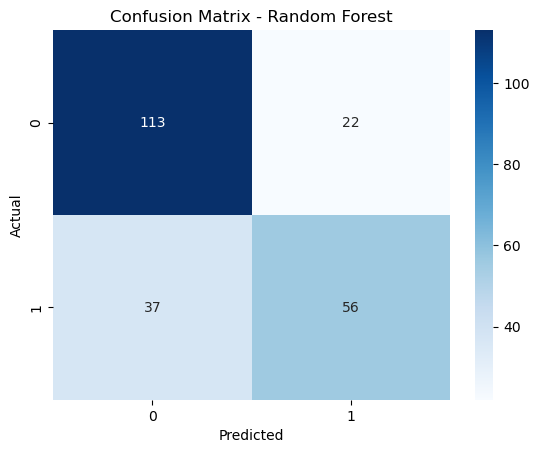

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.7631578947368421
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       135
           1       0.74      0.65      0.69        93

    accuracy                           0.76       228
   macro avg       0.76      0.74      0.75       228
weighted avg       0.76      0.76      0.76       228



 # ✅ Conclusion
- This Titanic survival prediction project demonstrates the end-to-end process of building and evaluating classification models using real-world data.

### 🔍 Key Takeaways:
- Effective feature engineering (like Family_size, Is_Alone, and Title) enhanced the dataset and allowed models to better distinguish between survivors and non-survivors.

- One-hot encoding of categorical variables (Sex, Embarked, Title) allowed us to include non-numeric data in model training.

- Feature scaling was critical for models like Logistic Regression and K-Nearest Neighbors, improving their accuracy and convergence.

| Model                   | Accuracy | Strengths                                             | Weaknesses                                         |
| ----------------------- | -------- | ----------------------------------------------------- | -------------------------------------------------- |
| **Logistic Regression** | \~78% | Interpretable, fast, baseline model                   | Lower recall for class 1 (survived)                |
| **Random Forest**       | Higher   | Captures non-linear relationships, robust to outliers | May overfit without tuning, harder to interpret    |
| **K-Nearest Neighbors** | Varies   | Simple, non-parametric, good on clean scaled data     | Sensitive to noise and scaling, slower on big data |


# 📊 Insights from Data
- Gender and class were key predictors of survival.

- Females had a much higher chance of survival than males.

- First class passengers had significantly higher survival rates.

- Family size and being alone affected survival probability.

- Feature scaling and encoding were crucial preprocessing steps that improved model accuracy.


# 🚀 Future Enhancements
- 🔍 Use GridSearchCV or RandomizedSearchCV to tune model hyperparameters.

- 📊 Apply cross-validation for more stable performance estimates.

- �� Explore advanced models like XGBoost, Gradient Boosting, or LightGBM.

- 🌐 Deploy the final model using Streamlit, Flask, or Gradio.

- 📈Visualize feature importances to better understand model decisions.

##### This project reflects a strong foundation in data 
preprocessing, feature engineering, model evaluation, and 
interpretation—key pillars of real-world data science and machine learning tasks.
